In [1]:
import numpy as np

def omega_b (ahat, xba):
    den = np.sqrt(1+(ahat.dot(xba/(np.sqrt(xba.dot(xba))))\
                         /(np.pi*xba.dot(xba))))
    return 0.5 * (1- 1/den)
def sum_terms(wc, xvec):
    ax = [0,1,2]
    ret = 0.0
    for x in ax:
        for y in ax:
            for z in ax:
                if x == y == z == 1:
                    continue
                ret += wc[x,y,z]*np.sqrt(xvec[x,y,z].dot(xvec[x,y,z]))

    return ret
def fnumber (xplus, xminus, wc, pm):
    if pm == 'm':
        return np.sqrt(0.5*(1 + sum_terms(wc, xplus)/ sum_terms(wc, xminus)))
    if pm == 'p':
        return np.sqrt(0.5*(1.+sum_terms(wc, xminus)/sum_terms(wc, xplus)))
                                         
        

In [2]:
dx = 1e-2
ax = [0,1,2]
c = np.array([0.,0.,0.])
fbpos = np.zeros((3,3,3,3))
for x in ax:
    for y in ax:
        for z in ax:
            fbpos[x,y,z,0] = (x-1)*dx
            fbpos[x,y,z,1] = (y-1)*dx
            fbpos[x,y,z,2] = (z-1)*dx

In [3]:
xba = c-fbpos
ahats = np.zeros((3,3,3,3))
for x in ax:
    for y in ax:
        for z in ax:
            if x == y == z == 1.0:
                ahats[x,y,z] = np.array([0.,0.,0.])
            else:
                ahats[x,y,z] = xba[x,y,z]/np.sqrt(xba[x,y,z]\
                                                  .dot(xba[x,y,z]))


In [4]:
wb = np.zeros((3,3,3))
for x in ax:
    for y in ax:
        for z in ax:
            if x==y==z==1:
                continue
            else:
                wb[x,y,z] = omega_b(ahats[x,y,z], xba[x,y,z])
wb /= np.sum(wb)

In [5]:
print(wb)


[[[0.03824106 0.03846305 0.03824106]
  [0.03846305 0.03875249 0.03846305]
  [0.03824106 0.03846305 0.03824106]]

 [[0.03846305 0.03875249 0.03846305]
  [0.03875249 0.         0.03875249]
  [0.03846305 0.03875249 0.03846305]]

 [[0.03824106 0.03846305 0.03824106]
  [0.03846305 0.03875249 0.03846305]
  [0.03824106 0.03846305 0.03824106]]]


In [8]:
xba_plus = np.zeros((3,3,3,3))
xba_minus = np.zeros((3,3,3,3))
for x in ax:
    for y in ax:
        for z in ax:
            for j in ax:
                xba_plus[x,y,z,j] = max([xba[x,y,z,j], 0.0])
                xba_minus[x,y,z,j] = min([xba[x,y,z,j],0.0])
                        

In [9]:
f_pm = np.zeros((3,3,3,3,2))
for x in ax:
    for y in ax:
        for z in ax:
            for alpha in ax:
                f_pm[x,y,z,alpha,0] = fnumber(xba_plus, xba_minus,wb, 'm')
                f_pm[x,y,z,alpha,1] = fnumber(xba_plus, xba_minus, wb, 'p')
            

In [10]:
weightFinal = np.zeros((3,3,3,3))
for x in ax:
    for y in ax:
        for z in ax:
            weightFinal[x,y,z] = wb[x,y,z] \
            * xba[x,y,z]/np.sqrt(xba[x,y,z]\
            .dot(xba[x,y,z]))
weightFinal[1,1,1] = [0,0,0]
print(weightFinal[1,1,1])

[0. 0. 0.]


/home/azton/simulations/depend/yt-conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


[[ 0.02207848  0.         -0.02207848]
 [ 0.02719748  0.         -0.02719748]
 [ 0.02207848  0.         -0.02207848]]


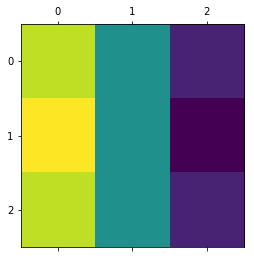

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
print(weightFinal[:,:,0,1])
plt.matshow(weightFinal[:,:,0,1])


In [2]:
xunits = 3.086e21
dunits = 1.6737e-25
tunits = 3.15e13
msolar = 1.9989e33
mh = 1.67e-24
nb = dunits/mh # n/cm^3
eunits = dunits*xunits**5/tunits # ergs
munits = dunits*xunits**3
punits = munits*xunits/tunits #Msolar*cm/s
e51 = 1e51 # ergs
e51 /= eunits #code
m_ej = 10.5 * msolar # g
m_ej /= munits # code
p_ej = np.sqrt(e51*eunits * 2.0 * m_ej*munits) # g*cm/s

In [3]:
print('%0.3e'%(p_ej/msolar/1e5))
print('%0.3e'%(p_ej/punits))

3.241e+04
1.344e-05


In [4]:
p_t = 4.8*10**5*(nb**(-1/7.))*(e51*eunits/1e51)**(13./14.)*2.0 # Msun*km/s
print('p_t [msun*km/s]: %0.3e'%p_t)
p_t *= msolar #g*km/s
p_t *= 1e5 # g*cm/s

p_t [msun*km/s]: 1.333e+06


In [5]:
print('%0.3e'%p_t)
print('%0.3e'%(p_t/punits))

2.666e+44
5.531e-04


In [6]:
10.5*munits

5.164813934041355e+40

In [7]:
print(munits, eunits, punits,nb)

4.9188704133727194e+39 1.4871222482295907e+69 4.8189314589422895e+47 0.10022155688622754
